<a href="/assets/tutorial13_code.ipynb" class="link-button">Download</a>
<a href="https://colab.research.google.com/github/technion046195/technion046195/blob/master/content/tutorial13/code.ipynb" target="_blank">
<img src="../assets/colab-badge.svg" style="display:inline"/>
</a>

<center><h1>
תרגול 13 - PCA and K-Means 
</h1></center>

## Setup

In [ ]:
## Importing packages
import os # A build in package for interacting with the OS. For example to create a folder.
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import imageio  # A package to read and write image (is used here to save gif images)
import tabulate  # A package from pretty printing tables
from graphviz import Digraph  # A package for plothing graphs (of nodes and edges)

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (4.5, 4.5)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations, pandas tables and images in cells output
from IPython.core.display import display, HTML, Latex, Markdown

## Create output folder
if not os.path.isdir('./output'):
    os.mkdir('./output')

## Ex 13.2

Plotting data

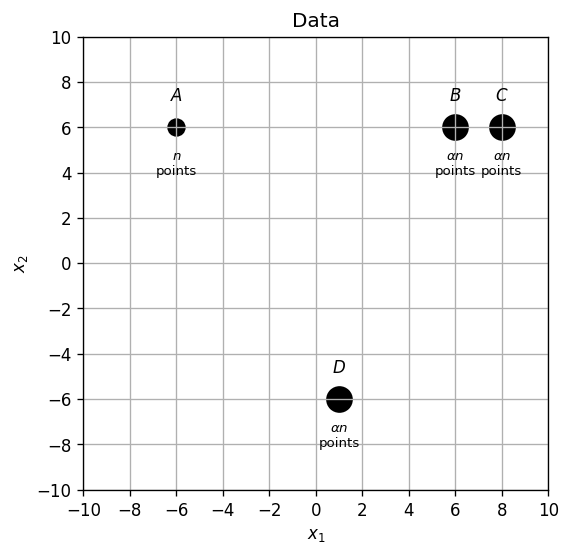

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.xaxis.set_ticks(np.arange(-10, 10 + 1e-6, 2))
ax.yaxis.set_ticks(np.arange(-10, 10 + 1e-6, 2))
ax.set_title('Data')

rand_gen = np.random.RandomState(1)


pa1 = ax.plot(-6, 6, 'o', ms=10, zorder=1, color='k')[0]
ax.text(-6, 6 + 1, '$A$', ha='center', va='bottom')
ax.text(-6, 6 - 1, '$n$\npoints', ha='center', va='top' ,fontsize=8)

pb1 = ax.plot(6, 6, 'o', ms=15, zorder=1, color='k')[0]
ax.text(6, 6 + 1, '$B$', ha='center', va='bottom')
ax.text(6, 6 - 1, '$\\alpha n$\npoints', ha='center', va='top' ,fontsize=8)

pc1 = ax.plot(8, 6, 'o', ms=15, zorder=1, color='k')[0]
ax.text(8, 6 + 1, '$C$', ha='center', va='bottom')
ax.text(8, 6 - 1, '$\\alpha n$\npoints', ha='center', va='top' ,fontsize=8)

pd1 = ax.plot(1, -6, 'o', ms=15, zorder=1, color='k')[0]
ax.text(1, -6 + 1, '$D$', ha='center', va='bottom')
ax.text(1, -6 - 1, '$\\alpha n$\npoints', ha='center', va='top' ,fontsize=8)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:3]
c1 = ax.plot([], [], 'o', ms=7, zorder = 2, color=colors[0], mec='black')[0]
c2 = ax.plot([], [], 'o', ms=7, zorder = 2, color=colors[1], mec='black')[0]
c3 = ax.plot([], [], 'o', ms=7, zorder = 2, color=colors[2], mec='black')[0]

fig.savefig('./output/ex_13_2_dataset.png', dpi=240)

##### Centers at A, B & C

In [ ]:
ax.set_title('Step 0a')

c1.set_data(-6, 6)
c2.set_data(6, 6)
c3.set_data(8, 6)

pa1.set_color(colors[0])
pb1.set_color(colors[1])
pc1.set_color(colors[2])
pd1.set_color(colors[1])

fig.savefig('./output/ex_13_2_a_case_1_0a.png', dpi=240)

In [ ]:
ax.set_title('Step 0b')

c2.set_data(3.5, 0)

fig.savefig('./output/ex_13_2_a_case_1_0b.png', dpi=240)

In [ ]:
ax.set_title('Step 1a')

pb1.set_color(colors[2])

fig.savefig('./output/ex_13_2_a_case_1_1a.png', dpi=240)

In [ ]:
ax.set_title('Step 1b')

c2.set_data(1, -6)
c3.set_data(7, 6)

fig.savefig('./output/ex_13_2_a_case_1_1b.png', dpi=240)

##### Center at A, B & D

In [ ]:
ax.set_title('Step 0a')

c1.set_data(-6, 6)
c2.set_data(6, 6)
c3.set_data(1, -6)

pa1.set_color(colors[0])
pb1.set_color(colors[1])
pc1.set_color(colors[1])
pd1.set_color(colors[2])

fig.savefig('./output/ex_13_2_a_case_2_0a.png', dpi=240)

In [ ]:
ax.set_title('Step 0b')

c2.set_data(7, 6)

fig.savefig('./output/ex_13_2_a_case_2_0b.png', dpi=240)

##### Centers at A, C & D 

In [ ]:
ax.set_title('Step 0a')

c1.set_data(-6, 6)
c2.set_data(8, 6)
c3.set_data(1, -6)

pa1.set_color(colors[0])
pb1.set_color(colors[1])
pc1.set_color(colors[1])
pd1.set_color(colors[2])

fig.savefig('./output/ex_13_2_a_case_3_0a.png', dpi=240)

In [ ]:
ax.set_title('Step 0b')

c2.set_data(7, 6)

fig.savefig('./output/ex_13_2_a_case_3_0b.png', dpi=240)

##### Centers at B, C & D

In [ ]:
ax.set_title('Step 0a')

c1.set_data(6, 6)
c2.set_data(8, 6)
c3.set_data(1, -6)

pa1.set_color(colors[0])
pb1.set_color(colors[0])
pc1.set_color(colors[1])
pd1.set_color(colors[2])

fig.savefig('./output/ex_13_2_a_case_4_0a.png', dpi=240)

for $\alpha>5$

In [ ]:
ax.set_title('Step 0b')

c1.set_data(5, 6)

fig.savefig('./output/ex_13_2_a_case_4_1_0b.png', dpi=240)

for $\alpha<5$

In [ ]:
ax.set_title('Step 0b')

c1.set_data(2, 6)

fig.savefig('./output/ex_13_2_a_case_4_2_0b.png', dpi=240)

In [ ]:
ax.set_title('Step 1a')

pb1.set_color(colors[1])

fig.savefig('./output/ex_13_2_a_case_4_2_1a.png', dpi=240)

In [ ]:
ax.set_title('Step 1b')

c1.set_data(-6, 6)
c2.set_data(7, 6)

fig.savefig('./output/ex_13_2_a_case_4_2_1b.png', dpi=240)